# COVID-19 Argentina por RJC

In [69]:
import os              # This provides several system utilities
import pandas as pd    # This is the workhorse of data munging in Python
import matplotlib.pyplot as plt
import seaborn as sns  # This allows us to easily and beautifully plot

# This ensures visualizations are plotted inside the notebook
%matplotlib inline

### Abro archivo con los datos del gobierno, Tasa diaria de contagios y muertos, total de recuperados y de tests

In [70]:
f = 'BD/Covid19_Arg.txt'    # Path to file containing the file
df = pd.read_csv(f, comment='#')    # Read csv file with comma sepparation
df.tail(10)

,Fecha,Contagios,Muertos,Recuperados_tot,Tests
376,3/16/2021,8235,202,"1,998,594","8,082,588"
377,3/17/2021,8304,195,"2,003,121","8,137,605"
378,3/18/2021,8328,155,"2,009,877","8,189,797"
379,3/19/2021,8160,113,"2,016,729","8,251,376"
380,3/20/2021,6826,42,"2,023,664","8,309,165"
381,3/21/2021,4032,28,"2,030,153","8,340,398"
382,3/22/2021,6401,126,"2,037,686","8,383,836"
383,3/23/2021,9404,122,"2,043,957","8,433,539"
384,3/24/2021,8300,123,"2,049,035","8,477,597"
385,3/25/2021,8238,146,"2,056,472","8,517,821"


### Separo por comas y indexto los dias a la tabla para graficar facilmente

In [71]:
df.set_index(pd.DatetimeIndex(df['Fecha']),inplace=True)
df.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df.tail(10) #ultimos 10 valores

,Contagios,Muertos,Recuperados_tot,Tests
Fecha,,,,
2021-03-16,8235,202,"1,998,594","8,082,588"
2021-03-17,8304,195,"2,003,121","8,137,605"
2021-03-18,8328,155,"2,009,877","8,189,797"
2021-03-19,8160,113,"2,016,729","8,251,376"
2021-03-20,6826,42,"2,023,664","8,309,165"
2021-03-21,4032,28,"2,030,153","8,340,398"
2021-03-22,6401,126,"2,037,686","8,383,836"
2021-03-23,9404,122,"2,043,957","8,433,539"
2021-03-24,8300,123,"2,049,035","8,477,597"


### Calculo la tasa diaria de recuperados, activos y tests

In [72]:
df['Recuperados'] = df['Recuperados_tot'].diff()
df['Tests_diario'] = df['Tests'].diff()
df['Activos']=df['Contagios']-df['Recuperados']-df['Muertos']
df['Activos'] = pd.to_numeric(df['Activos'])
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos
Fecha,,,,,,,
2021-03-16,8235,202,"1,998,594","8,082,588","5,379","49,875","2,654"
2021-03-17,8304,195,"2,003,121","8,137,605","4,527","55,017","3,582"
2021-03-18,8328,155,"2,009,877","8,189,797","6,756","52,192","1,417"
2021-03-19,8160,113,"2,016,729","8,251,376","6,852","61,579","1,195"
2021-03-20,6826,42,"2,023,664","8,309,165","6,935","57,789",-151
2021-03-21,4032,28,"2,030,153","8,340,398","6,489","31,233","-2,485"
2021-03-22,6401,126,"2,037,686","8,383,836","7,533","43,438","-1,258"
2021-03-23,9404,122,"2,043,957","8,433,539","6,271","49,703","3,011"
2021-03-24,8300,123,"2,049,035","8,477,597","5,078","44,058","3,099"


### Calculo el total de contagios, muertos y activos

In [73]:
df['Contagios_tot'] = df['Contagios'].cumsum()
df['Muertos_tot'] = df['Muertos'].cumsum()
df['Activos_tot']=df['Contagios_tot']-df['Recuperados_tot']-df['Muertos_tot']

pd.options.display.float_format = '{:,.0f}'.format #en enteros sin coma
df.tail(10)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot
Fecha,,,,,,,,,,
2021-03-16,8235,202,"1,998,594","8,082,588","5,379","49,875","2,654",2210122,54042,"157,486"
2021-03-17,8304,195,"2,003,121","8,137,605","4,527","55,017","3,582",2218426,54237,"161,068"
2021-03-18,8328,155,"2,009,877","8,189,797","6,756","52,192","1,417",2226754,54392,"162,485"
2021-03-19,8160,113,"2,016,729","8,251,376","6,852","61,579","1,195",2234914,54505,"163,680"
2021-03-20,6826,42,"2,023,664","8,309,165","6,935","57,789",-151,2241740,54547,"163,529"
2021-03-21,4032,28,"2,030,153","8,340,398","6,489","31,233","-2,485",2245772,54575,"161,044"
2021-03-22,6401,126,"2,037,686","8,383,836","7,533","43,438","-1,258",2252173,54701,"159,786"
2021-03-23,9404,122,"2,043,957","8,433,539","6,271","49,703","3,011",2261577,54823,"162,797"
2021-03-24,8300,123,"2,049,035","8,477,597","5,078","44,058","3,099",2269877,54946,"165,896"


### Interpolaciones

In [74]:
import numpy as np
N=7
df["Contagios_MA"]=df.Contagios.rolling(window=N).mean()
df["Recuperados_MA"]=df.Recuperados.rolling(window=N).mean()
df["Muertos_MA"]=df.Muertos.rolling(window=N).mean()
df["Tests_diario_MA"]=df.Tests_diario.rolling(window=N).mean()

### Grafico de tasa diaria

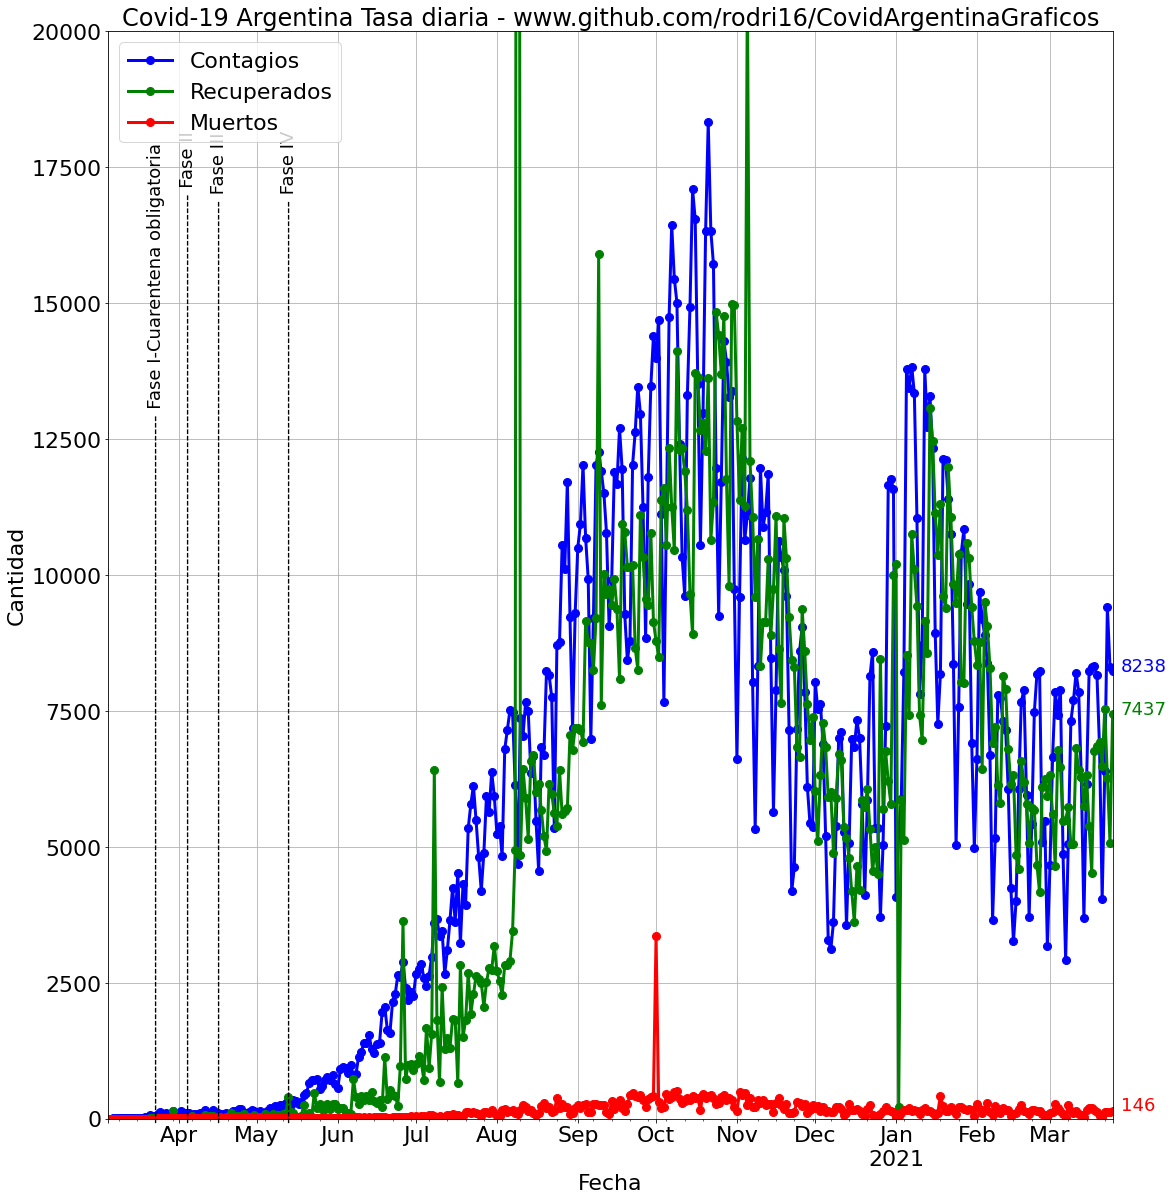

In [75]:
ax=df.plot(y=['Contagios','Recuperados','Muertos'], color=['blue',"green",'red'],legend='true',style='-',grid='on',figsize=(18,20),linewidth=3, marker='o', markersize=8, fontsize=22)

plt.title('Covid-19 Argentina Tasa diaria - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['Contagios', 'Recuperados',"Muertos"],loc='upper left', fontsize=22);
plt.ylabel('Cantidad', fontsize=22)
plt.xlabel('Fecha', fontsize=22)
#ax.text('2020-4-2',280,'https://github.com/rodri16/CovidArgentinaGraficos',fontsize=10)
#agrega ultimo numero
#for var in (df.Contagios,df.Recuperados,df.Muertos):
#    plt.annotate('%d' % var.iloc[-1], xy=(1, var.iloc[-1]), xytext=(8, 0), 
#                 xycoords=('axes fraction', 'data'), textcoords='offset points')
    
plt.annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='blue',size=18)
plt.annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='green',size=18)
plt.annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='red',size=18)

    # Add labels to the plot
style = dict(size=18, color='black')    
#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "------------------------------------------------------------------------------------------------------------- Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "----------------------------------------------------------------------------------------------------------------------------------------------- Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "---------------------------------------------------------------------------------------------------------------------------------------------- Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "---------------------------------------------------------------------------------------------------------------------------------------------- Fase IV",rotation=90, **style)


#valor minimo eje y = 0
plt.gca().set_ylim(bottom=0,top=20000)


#Salvo el grafico con la ultima fecha
name='Graficos/2021/Marzo/TasaDiariaLine_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name, bits=16)

### Subolots con la media de cada grafico

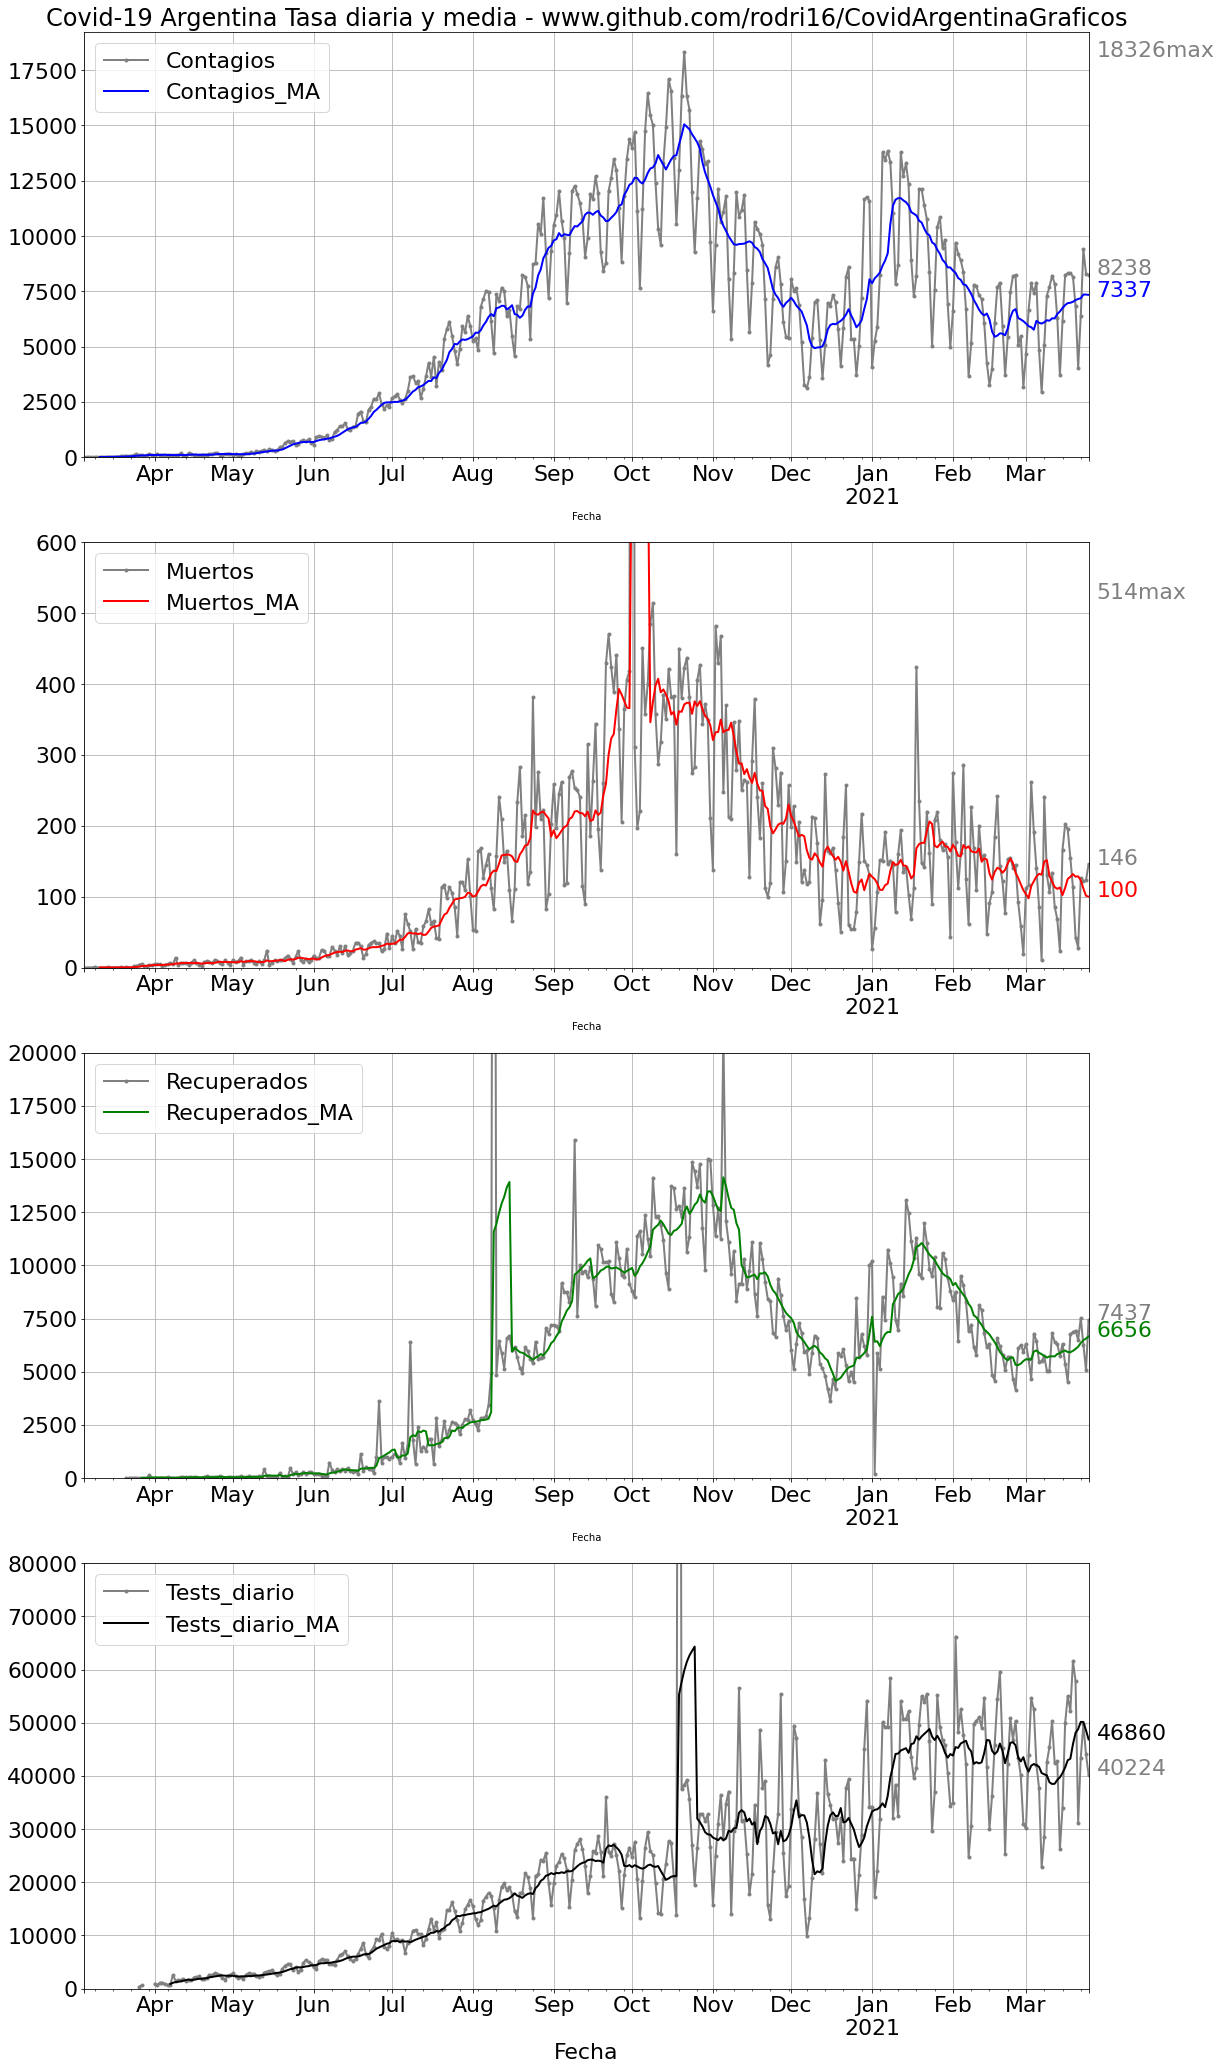

In [76]:
fig, axs = plt.subplots(4,1)

#ax=df.plot(y=['Contagios','Contagios_MA','Muertos','Recuperados','Tests_diario'],color=['blue','red',"green",'grey'],figsize=(18,22),subplots='true',style='.-',grid='on',linewidth=2, marker='o', fontsize=22)#df[df['Contagios_tot'] > 100]
plt.xlabel('Fecha', fontsize=22)

df.plot(y=['Contagios','Contagios_MA'],color=['grey','blue'],figsize=(18,36),style=['.-',''],grid='on',linewidth=2, fontsize=22,ax=axs[0])
axs[0].set_title('Covid-19 Argentina Tasa diaria y media - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

axs[0].annotate('%d' % df.Contagios.iloc[-1], xy=(1, df.Contagios.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey")  
axs[0].set_ylim(bottom=0)
axs[0].legend(fontsize=22,loc='upper left')
axs[0].annotate('%dmax' % df.Contagios.max(), xy=(1, df.Contagios.max()*0.99), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey")
axs[0].legend(fontsize=22,loc='upper left')
axs[0].annotate('%d' % df.Contagios_MA.iloc[-1], xy=(1, df.Contagios_MA.iloc[-1]*0.99), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")

df.plot(y=['Muertos','Muertos_MA'],color=['grey','red'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[1])
axs[1].annotate('%d' % df.Muertos.iloc[-1], xy=(1, df.Muertos.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
axs[1].set_ylim(bottom=0,top=600)
axs[1].legend(fontsize=22,loc='upper left')

axs[1].annotate("514max", xy=(1, 520), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey")
axs[1].annotate('%d' % df.Muertos_MA.iloc[-1], xy=(1, df.Muertos_MA.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 


df.plot(y=['Recuperados','Recuperados_MA'],color=['grey','green'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[2])
axs[2].annotate('%d' % df.Recuperados.iloc[-1], xy=(1, df.Recuperados.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
axs[2].set_ylim(bottom=0,top=20000)
axs[2].legend(fontsize=22,loc='upper left')
axs[2].annotate('%d' % df.Recuperados_MA.iloc[-1], xy=(1, df.Recuperados_MA.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 

df.plot(y=['Tests_diario','Tests_diario_MA'],color=['grey','black'],figsize=(18,36),style=['.-','-'],grid='on',linewidth=2, fontsize=22,ax=axs[3])

axs[3].annotate('%d' % df.Tests_diario.iloc[-1], xy=(1, df.Tests_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
axs[3].set_ylim(bottom=0, top=80000)
axs[3].legend(fontsize=22,loc='upper left')
axs[3].annotate('%d' % df.Tests_diario_MA.iloc[-1], xy=(1, df.Tests_diario_MA.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="black") 

name='Graficos/2021/Marzo/TasaDiaria_MA_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico de barras de los tests diarias

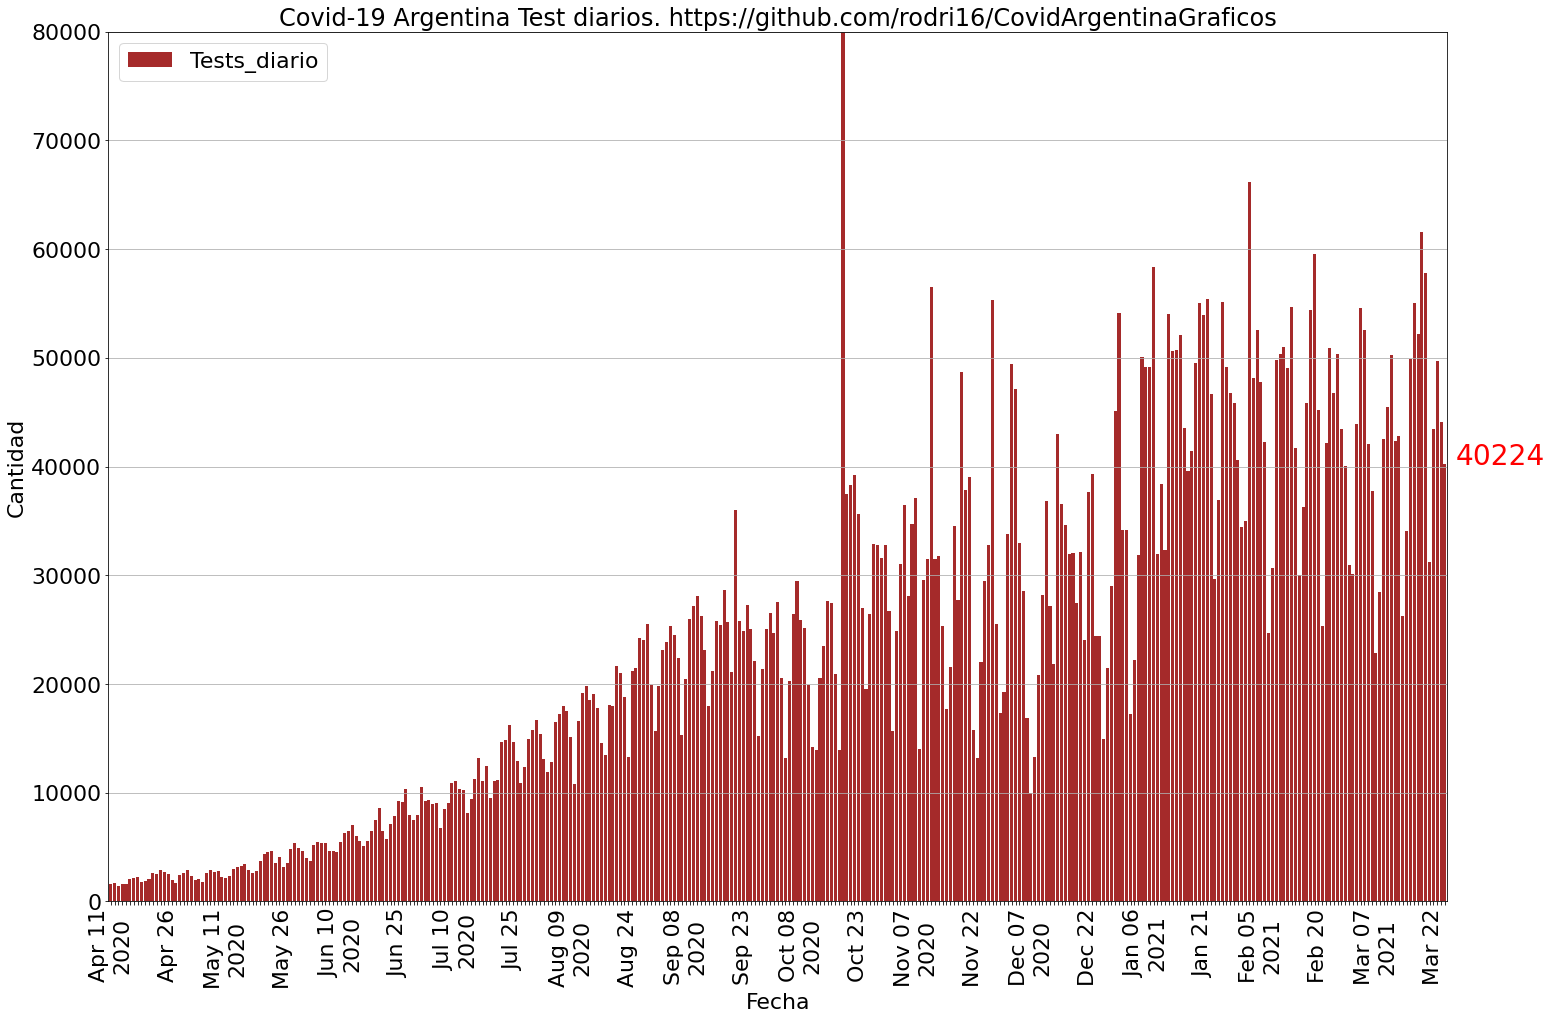

In [77]:
ax=df[df.index > '2020-4-10'].Tests_diario.plot.bar(color=['brown'],width=0.8, legend='true',figsize=(24,16), fontsize=22)

#arreglo el formato de la fecha
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(df[df.index > '2020-4-10'].index.to_series().dt.strftime("%d %b")))#arregla la fecha

# Make most of the ticklabels empty so the labels don't get too crowded
import matplotlib.ticker as ticker
ticklabels = ['']*len(df[df.index > '2020-4-10'].index)
# Every 7th ticklable shows the month and day
ticklabels[::15] = [item.strftime('%b %d') for item in df[df.index > '2020-4-10'].index[::15]]
# Every 35th ticklabel includes the year
ticklabels[::30] = [item.strftime('%b %d\n%Y') for item in df[df.index > '2020-4-10'].index[::30]]
ax.xaxis.set_major_formatter(ticker.FixedFormatter(ticklabels))

#agrego grid
plt.grid(axis='y')
plt.legend(fontsize=22,loc='upper left')
plt.xlabel('Fecha',fontsize=22)
plt.title('Covid-19 Argentina Test diarios. https://github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.ylabel('Cantidad', fontsize=22)
plt.gca().set_ylim(bottom=0, top=80000)

#numeros arriba de la barra
#for p in ax.patches:
#    ax.annotate(int(p.get_height()), (p.get_x() * 0.995, p.get_height() * 1.009),rotation=90, fontsize=18)

#ultimo numero
plt.annotate('%d' % df.Tests_diario.iloc[-1], xy=(1, df.Tests_diario.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',color='red',size=28)

    #salvo grafico
name='Graficos/2021/Marzo/TestDiarioBar_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Grafico Totales (el mas completo!!)

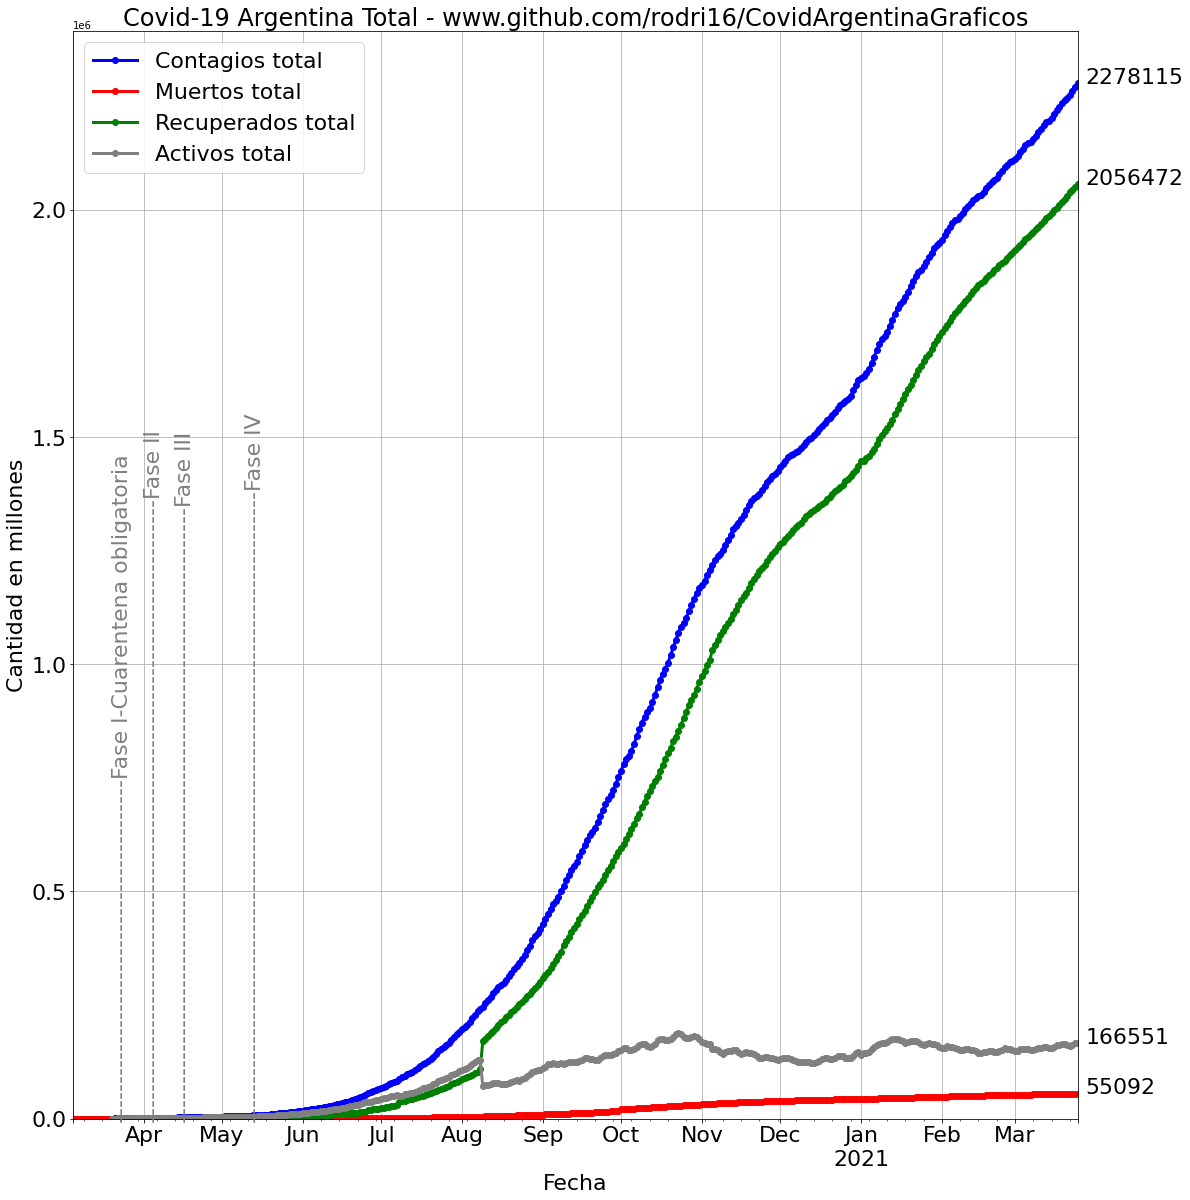

In [78]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Muertos_tot','Recuperados_tot',"Activos_tot"],color=['blue','red',"green",'grey'],fontsize=22, style='-',grid='on',figsize=(18,20),linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.xlabel('Fecha', fontsize=22)
plt.ylabel('Cantidad en millones', fontsize=22)
plt.legend(['Contagios total','Muertos total','Recuperados total',"Activos total"],loc='upper left', fontsize=22);
#ax.text('2020-4-2',5800,'www.github.com/rodri16/CovidArgentinaGraficos',fontsize=10)

#agrega ultimo valor
for var in (df.Contagios_tot,df.Muertos_tot,df.Recuperados_tot):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22)

plt.annotate('%d' % df.Activos_tot.iloc[-1], xy=(1, df.Activos_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22)   
# Add labels to the plot
style = dict(size=22, color='gray')

#Texto de la cuarentena obligatoria
ax.text('2020-3-20', 10, "-------------------------------------------Fase I-Cuarentena obligatoria",rotation=90, **style)
#Texto de la Fase II
ax.text('2020-4-1', 10, "------------------------------------------------------------------------------Fase II",rotation=90, **style)
#Texto de la Fase III
ax.text('2020-4-13', 10, "-----------------------------------------------------------------------------Fase III",rotation=90, **style)
#Texto de la Fase IV
ax.text('2020-5-10', 10, "-------------------------------------------------------------------------------Fase IV",rotation=90, **style)

#ax.set_facecolor("black")
#valor minimo en y = 0
plt.gca().set_ylim(bottom=0)

name='Graficos/2021/Marzo/Contagios_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name, bits=16)

### Grafico de totales igual al anterior pero en escala logaritmica, se pueden ver un poco mejor lo valores chicos con respecto a los grandes pero es un poco tricky

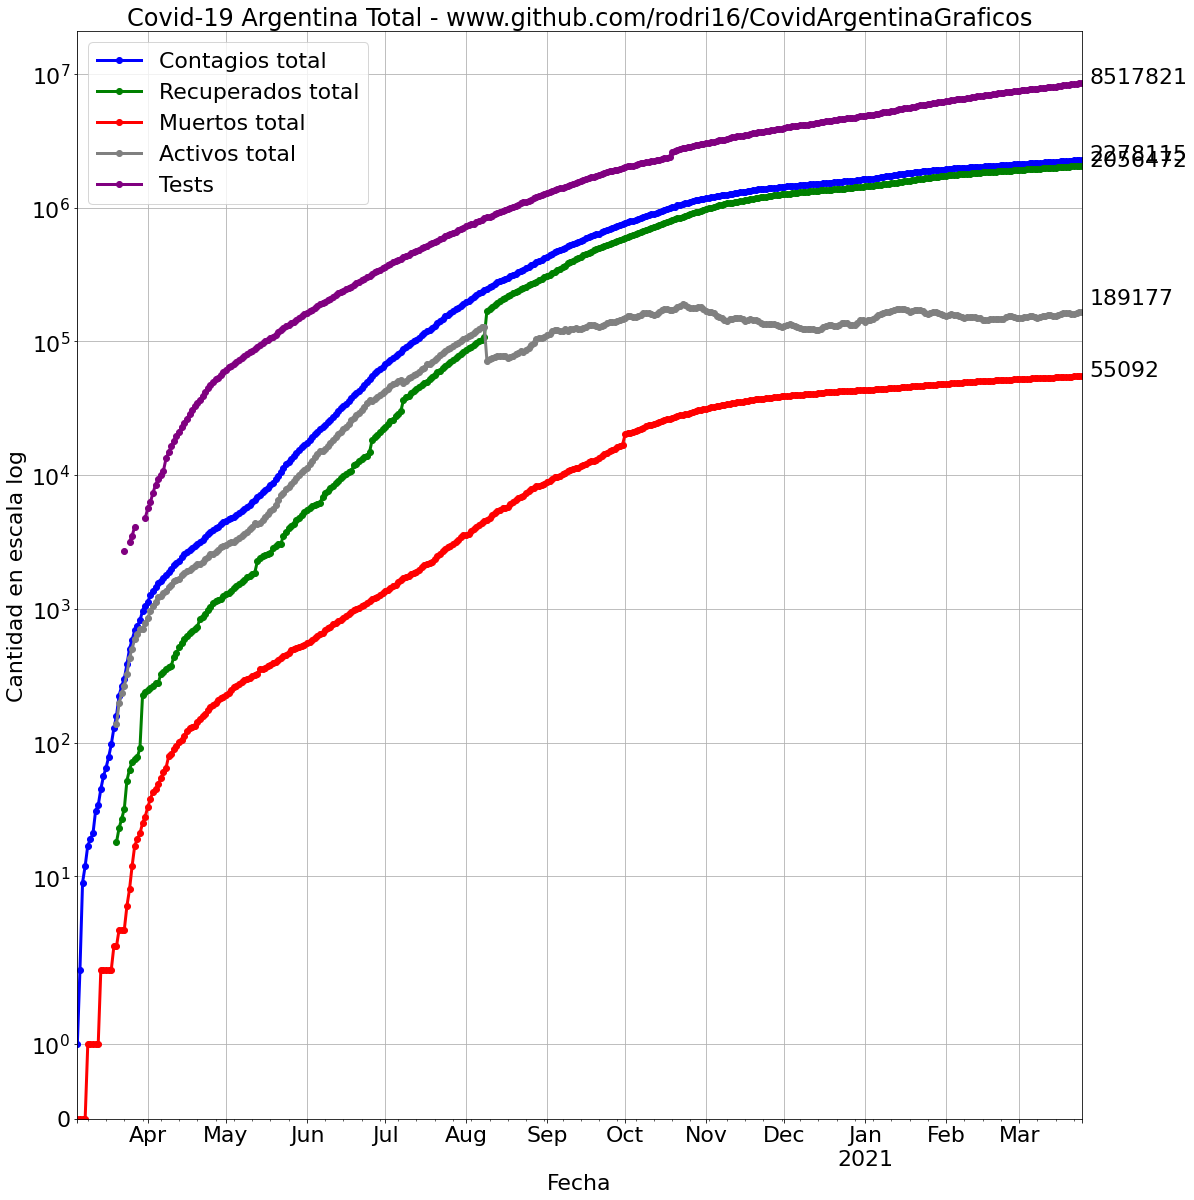

In [79]:
import matplotlib.ticker as mticker
ax=df.plot(y=['Contagios_tot','Recuperados_tot','Muertos_tot',"Activos_tot","Tests"],color=['blue',"green",'red','grey','purple'],logy="sym", style='-',grid='on',figsize=(18,20),fontsize=22,linewidth=3, marker='o')
plt.title('Covid-19 Argentina Total - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.xlabel('Fecha', fontsize=22)
plt.ylabel('Cantidad en escala log', fontsize=22)
plt.legend(['Contagios total','Recuperados total','Muertos total',"Activos total","Tests"],loc='upper left', fontsize=22);
#ax.yaxis.set_major_formatter(mticker.ScalarFormatter())


for var in (df.Contagios_tot,df.Recuperados_tot,df.Muertos_tot,df.Activos_tot,df.Tests):
    plt.annotate('%d' % var.max(), xy=(1, var.max()), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points', fontsize=22)

plt.gca().set_ylim(bottom=0)

name='Graficos/2021/Marzo/Contagios_totTests_log'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Subplots de los totales

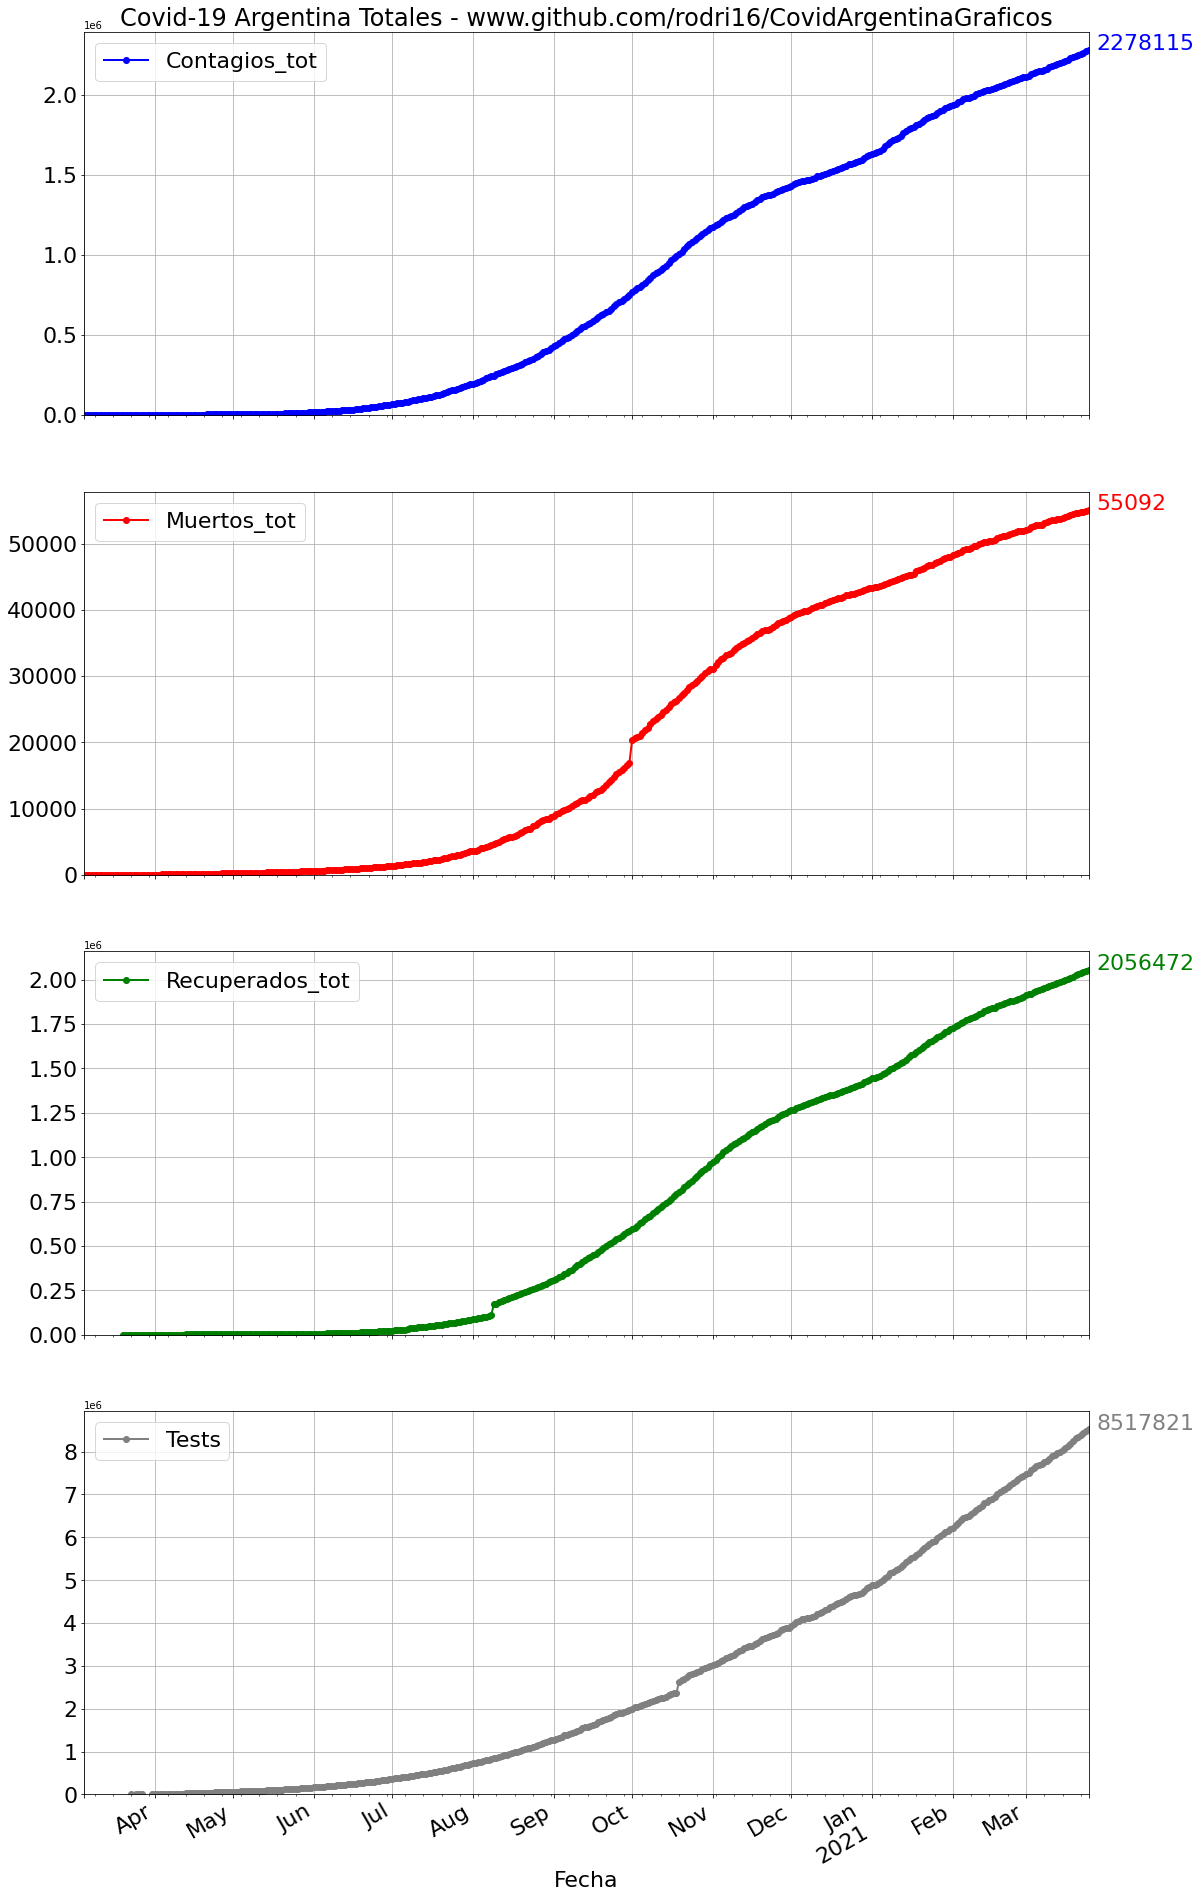

In [80]:
ax=df.plot(y=['Contagios_tot','Muertos_tot', 'Recuperados_tot',"Tests"],color=['blue','red','green','grey'],figsize=(18,36),subplots='true',style='.-',grid='on',linewidth=2, marker='o',fontsize=22)#df[df['Contagios_tot'] > 100]

plt.xlabel('Fecha', fontsize=22)

ax[0].set_title('Covid-19 Argentina Totales - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)

ax[0].annotate('%d' % df.Contagios_tot.iloc[-1], xy=(1, df.Contagios_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue")  
ax[0].set_ylim(bottom=0)
ax[0].legend(fontsize=22)

ax[1].annotate('%d' % df.Muertos_tot.iloc[-1], xy=(1, df.Muertos_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="red") 
ax[1].set_ylim(bottom=0)
ax[1].legend(fontsize=22)

ax[2].annotate('%d' % df.Recuperados_tot.iloc[-1], xy=(1, df.Recuperados_tot.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 
ax[2].set_ylim(bottom=0)
ax[2].legend(fontsize=22)

ax[3].annotate('%d' % df.Tests.iloc[-1], xy=(1, df.Tests.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="grey") 
ax[3].set_ylim(bottom=0)
ax[3].legend(fontsize=22)

name='Graficos/2021/Marzo/Todos_tot_'+df.index[-1].strftime("%d%b")#str(df.index[-1])+'.png'
plt.savefig(name)

### Relacion entre nuevos contagios y gente testeada

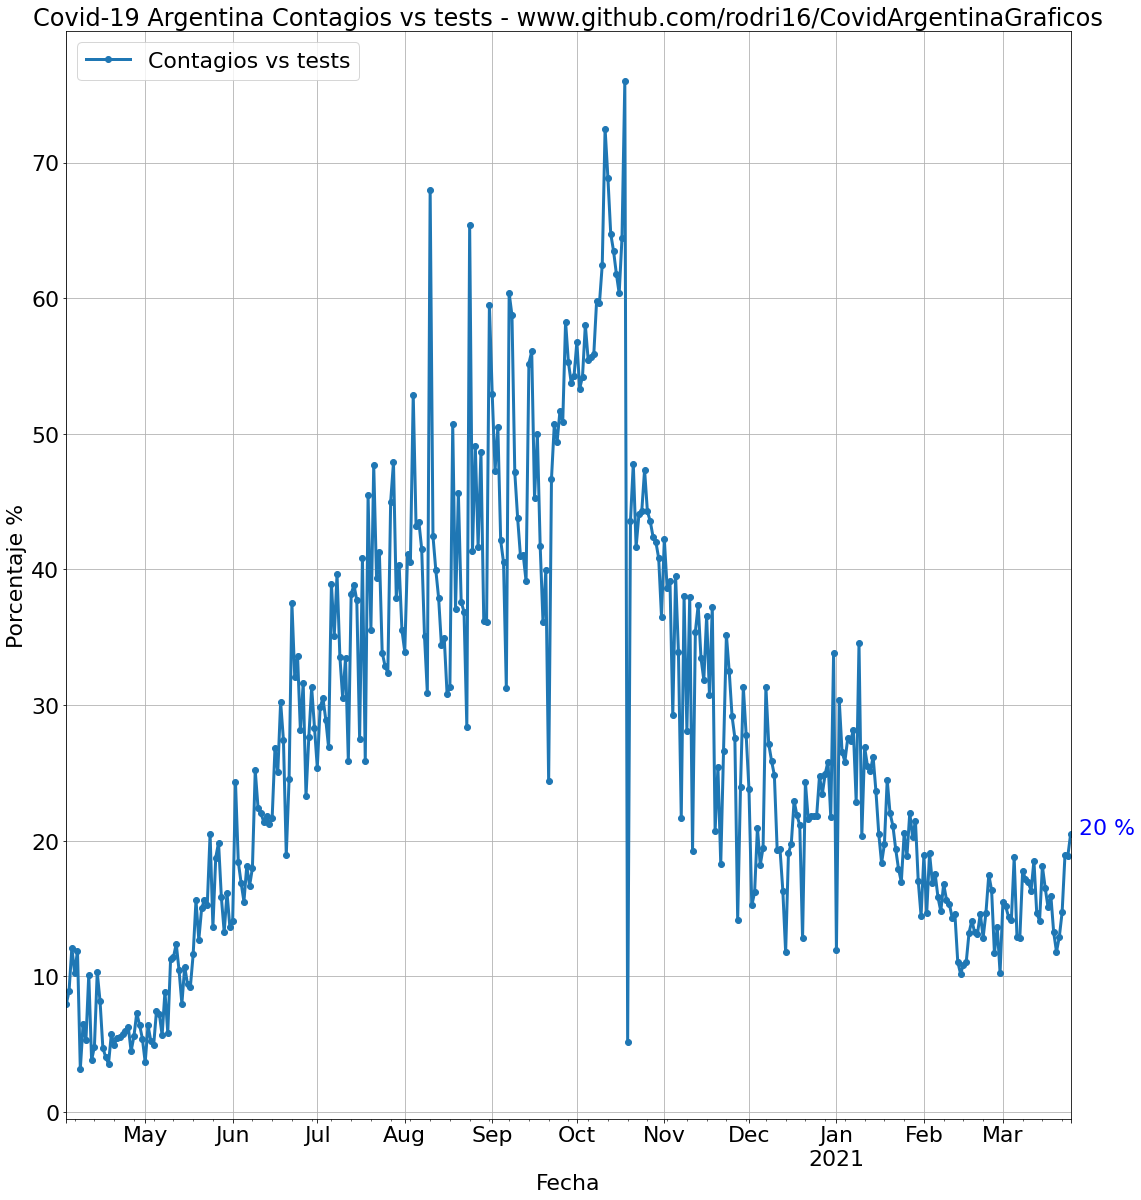

In [81]:
df['cont_test']=df['Contagios']/df['Tests_diario']*100
df[df.index > '2020-4-2']['cont_test'].plot(legend='true',style='-',grid='on',figsize=(18,20),linewidth=3, marker='o', fontsize=22)
plt.title('Covid-19 Argentina Contagios vs tests - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['Contagios vs tests'],loc='upper left', fontsize=22);
plt.ylabel('Porcentaje %', fontsize=22)
plt.xlabel('Fecha',fontsize=22)
plt.annotate('%d %%' % df.cont_test.iloc[-1], xy=(1, df.cont_test.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue") 

name='Graficos/2021/Marzo/Tasa_Cont_Test'+df.index[-1].strftime("%d%b")#+'.svg'#str(df.index[-1])+'.eps'
plt.savefig(name)

### Meto todos los datos en una tabla

In [82]:
name='csv _datos_completos/2021/Marzo/Covid_arg_completo'+df.index[-1].strftime("%d%b")+'.csv'#str(df.index[-1])
df.to_csv(name, index=True)

In [83]:
 df.tail(5)

,Contagios,Muertos,Recuperados_tot,Tests,Recuperados,Tests_diario,Activos,Contagios_tot,Muertos_tot,Activos_tot,Contagios_MA,Recuperados_MA,Muertos_MA,Tests_diario_MA,cont_test
Fecha,,,,,,,,,,,,,,,
2021-03-21,4032,28,"2,030,153","8,340,398","6,489","31,233","-2,485",2245772,54575,"161,044","7,150","6,179",129,"48,818",13
2021-03-22,6401,126,"2,037,686","8,383,836","7,533","43,438","-1,258",2252173,54701,"159,786","7,184","6,353",123,"50,160",15
2021-03-23,9404,122,"2,043,957","8,433,539","6,271","49,703","3,011",2261577,54823,"162,797","7,351","6,480",112,"50,136",19
2021-03-24,8300,123,"2,049,035","8,477,597","5,078","44,058","3,099",2269877,54946,"165,896","7,350","6,559",101,"48,570",19
2021-03-25,8238,146,"2,056,472","8,517,821","7,437","40,224",655,2278115,55092,"166,551","7,337","6,656",100,"46,861",20


In [84]:
f2 = 'BD/vacunados.txt'    # Path to file containing the file
df1 = pd.read_csv(f2, comment='#')    # Read csv file with comma sepparation
df1.tail(10)
df1.set_index(pd.DatetimeIndex(df1['Fecha']),inplace=True)
df1.drop('Fecha', axis=1, inplace=True)
#df['Recuperados_tot'] = pd.to_numeric(df['Recuperados_tot'])

df1.tail(10) #ultimos 10 valores

,vacuna1,vacuna2
Fecha,,
2021-03-16,2131493,487666
2021-03-17,2253351,509321
2021-03-18,2353207,546922
2021-03-19,2445509,580955
2021-03-20,2504255,603551
2021-03-21,2528096,606358
2021-03-22,2535054,607390
2021-03-23,2675311,630264
2021-03-24,2722622,635150


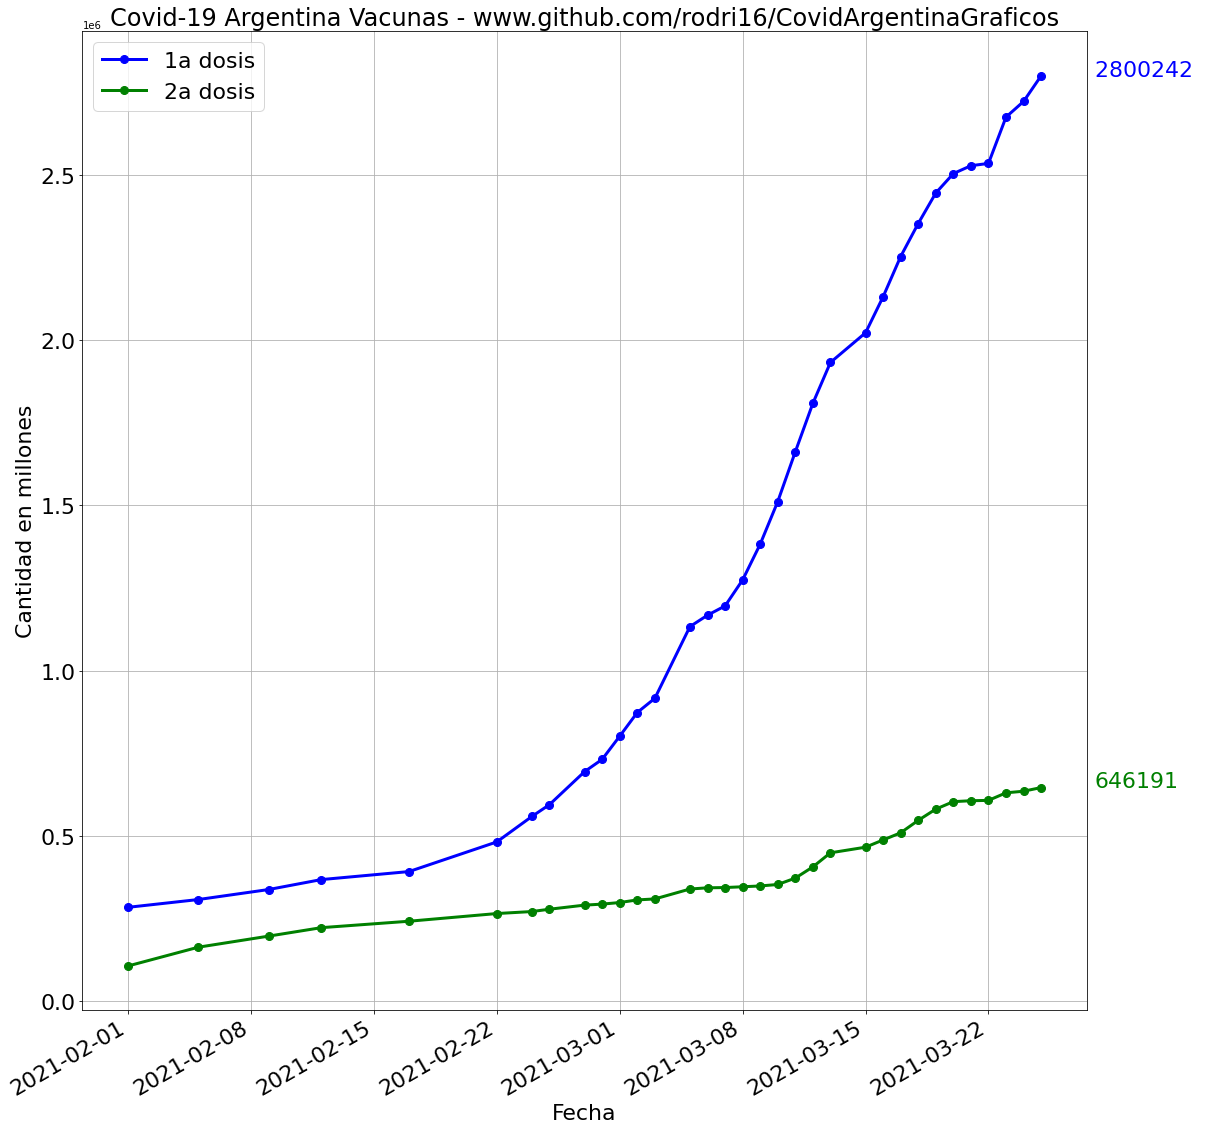

In [85]:
ax=df1.plot(y=['vacuna1','vacuna2'], color=['blue',"green"],legend='true',style='.-',grid='on',figsize=(18,20),linewidth=3, marker='o', markersize=8, fontsize=22)

plt.title('Covid-19 Argentina Vacunas - www.github.com/rodri16/CovidArgentinaGraficos',fontsize=24)
plt.legend(['1a dosis', '2a dosis'],loc='upper left', fontsize=22);
plt.ylabel('Cantidad en millones', fontsize=22)
plt.xlabel('Fecha', fontsize=22)
plt.annotate('%d ' % df1.vacuna1.iloc[-1], xy=(1, df1.vacuna1.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="blue") 
plt.annotate('%d' % df1.vacuna2.iloc[-1], xy=(1, df1.vacuna2.iloc[-1]), xytext=(8, 0), 
                 xycoords=('axes fraction', 'data'), textcoords='offset points',size=22, color="green") 

name='Graficos/2021/Marzo/Vacunas_'+df1.index[-1].strftime("%d%b")#+'.svg'#str(df.index[-1])+'.eps'
plt.savefig(name)